### Airbnb Price Prediction ( Modelling)
### Author: Apurba Pandey
### Date: 22 November 2023

# Table Of Content

1. [Introduction](#Introduction)
2. [Base Modeling](#Base-Modeling)
3. [Advanced Modeling](#Advanced-Modeling)
   1. [Linear Regression](#Linear-Regression)
   2. [Random Forest](#Random-Forest)
   3. [XG Boost](#XG-Boost)
   4. [Deep Learning](#Deep-Learning)
4. [Results](#Results)
5. [Conclusion](#Conclusion)
6. [Future Plan](#Future-Plan)


# Introduction <a id="Introduction"></a>

In the modeling section of our project, we focus on harnessing various machine learning algorithms to predict Airbnb prices. Starting with the simplicity of linear regression and progressing to the complexity of ensemble methods like Random Forest and XGBoost, we aim to capture the diverse factors influencing rental rates. Deep learning will also be explored for its ability to find complex patterns. Through these models, we will provide Airbnb hosts with accurate, actionable insights to optimize their listings and boost their earnings. This is where data transforms into tangible strategies for success.

In [158]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import re
from IPython.display import Image
from joblib import dump

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import RocCurveDisplay, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
# Read the Dataframe and assign it to final_df
final_df = pd.read_csv("modelling_section.csv")

In [3]:
# Checkout the DataFrame
final_df.head()

,Unnamed: 0,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,host_verification_work_email,neighbourhood_Kensington-Chinatown,neighbourhood_Le Plateau-Mont-Royal,neighbourhood_Other,neighbourhood_Trinity-Bellwoods,neighbourhood_Ville-Marie,neighbourhood_Waterfront Communities-The Island,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,1.0,0.000000,0.897648,0.0,3.0,1.0,0.0,43.64080,-79.37673,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,4.0,1.000000,0.930000,1.0,16.0,1.0,1.0,43.66143,-79.40883,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,4.0,0.948186,0.897648,0.0,1.0,1.0,1.0,43.78345,-79.44525,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,3.0,1.000000,0.220000,0.0,10.0,1.0,1.0,43.64608,-79.39032,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,4.0,1.000000,0.800000,0.0,1.0,1.0,1.0,43.68219,-79.35405,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Drop the unnamed column
final_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
# Checkout the DataFrame to see the column has been dropped
final_df.head(2)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,host_verification_work_email,neighbourhood_Kensington-Chinatown,neighbourhood_Le Plateau-Mont-Royal,neighbourhood_Other,neighbourhood_Trinity-Bellwoods,neighbourhood_Ville-Marie,neighbourhood_Waterfront Communities-The Island,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,0.0,0.897648,0.0,3.0,1.0,0.0,43.64080,-79.37673,2,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4.0,1.0,0.930000,1.0,16.0,1.0,1.0,43.66143,-79.40883,1,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Base Modelling <a id="Base-Modeling"></a>

### (Linear Regression)

In the base modeling section of our analysis, we have opted to utilize Linear Regression as our primary predictive model.We chose Linear Regression for its simplicity and interpretability. It allows us to quantify the strength and type of relationship between each feature and the target variable, which is the price column for us.

### First Iteration

In [6]:
# Define X and y for modelling
X = final_df.drop("price",axis=1)
y = final_df["price"]

#Split the dataset into train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Since its liearn regression and distance matters, we wil normalize the data
Sc = StandardScaler()
X_train_scaled = Sc.fit_transform(X_train) # fit X_train
X_test_scaled = Sc.transform(X_test) # we only transform the X_test

# Instantiate the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)

# Predict using .predict
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model using R^2 and MAE
r2_score = lr_model.score(X_test_scaled, y_test)
mse = mean_squared_error(y_test, y_pred)

# Output the evaluation metrics
print(f'R^2 Score: {r2_score}')
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.4951674442636602
Mean Squared Error: 2789.877194218883


#### Interpretation

- The R-squared score of 0.494 indicates that approximately 49.4% of the variation in the target variable (price) can be explained by the model's inputs. This suggests a moderate level of predictive accuracy.

- The Mean Squared Error (MSE) of 2811 indicates that the model's predictions generally match the actual data, with an average squared difference of about 2811. A lower MSE indicates better model performance. This MSE of 2811 can be used as a benchmark for comparing model accuracy.

**Collinearity is when two or more variables in a dataset are highly correlated. This means that one variable can be linearly predicted from the others. In other words, if you know the value of one variable, you can use it to predict the value of another.**

**Multicollinearity is a more serious issue. It's when two or more variables are highly correlated, so much so that one can be linearly predicted from the others. This can cause problems in our regression model.**

**Now, let's build a new linear regression model. We'll look for variables that don't support the predictive power for price and drop them.**

### Collinearity

In [7]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Select upper triangle of corr matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with high correlation (greater than 0.8)
collinear_columns = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Drop features with high correlation
X_collinear_reduced = X.drop(columns=collinear_columns)

# Display the dropped columns and the remaining shape of the DataFrame
print("Columns dropped due to collinearity:", collinear_columns)
print("\n")
print("Shape:", X_collinear_reduced.shape)


Columns dropped due to collinearity: ['longitude', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']


Shape: (60291, 58)


### MultiCollinearity

VIF is used to find multicollineraity in the features. Usually VIF with 5 is considered high, However, in our case, we will drop the features with VIF more than 10

In [8]:
# Function to calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [9]:
# Calculate VIF for the current set of features
vif_data = calculate_vif(X_collinear_reduced)
vif_data.head()

,Feature,VIF
0,host_response_time,2.384553
1,host_response_rate,2.244840
2,host_acceptance_rate,1.379516
3,host_is_superhost,1.305179
4,host_total_listings_count,2.757615


In [12]:
# Give features that have a high VIF
features_with_high_vif = vif_data[vif_data['VIF'] > 10]['Feature'].tolist() # threshold = 10

# Drop the features with high VIF f
X_multicollinear_reduced = X_collinear_reduced.drop(features_with_high_vif, axis=1)

# dropped features
print("Features dropped due to high VIF:", features_with_high_vif)

Features dropped due to high VIF: ['neighbourhood_Kensington-Chinatown', 'neighbourhood_Le Plateau-Mont-Royal', 'neighbourhood_Other', 'neighbourhood_Trinity-Bellwoods', 'neighbourhood_Ville-Marie', 'neighbourhood_Waterfront Communities-The Island']


In [13]:
# Checkout the shape of the dataframe
X_multicollinear_reduced.shape # the shape has reduced from 63 columns to 52 columns

(60291, 52)

### Second Iteration

In [14]:
# Define X and y for modelling
X = X_multicollinear_reduced
y = final_df["price"]

# Split the scaled data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Instantiate the linear regression model
lr_model2 = LinearRegression()

# Fit the model 
lr_model2.fit(X_train_scaled, y_train)

# Predict 
y_pred = lr_model2.predict(X_test_scaled)

# Evaluate the model using R^2 and MSE
r2_score = lr_model2.score(X_test_scaled, y_test)
mse = mean_absolute_error(y_test, y_pred)

# evaluation metrics
print(f'R^2 Score: {r2_score}')
print(f'Mean Squared Error: {mse}')


R^2 Score: 0.4473121012868341
Mean Squared Error: 40.644076942587375


#### Interpretation

After we refined our model by removing collinear and multicollinear features, we got a new R-squared score of approximately 0.446. This score means that our Linear Regression model can now explain around 44.6% of the variability in the price. It's less than before, but it's still a significant improvement. This could suggest a more robust model, as it reduces the potential for overfitting that might have occurred due to these features.

In [15]:
# Creating a dataframe to see the coefficients with the features
pd.DataFrame(lr_model2.coef_, 
             index=X_multicollinear_reduced.columns, columns=['Coeff']).sort_values(by ='Coeff', ascending = False)

,Coeff
accommodates,1.742739e+01
license,1.428042e+01
availability_30,1.082243e+01
amenities,8.731753e+00
bedrooms,7.292981e+00
review_scores_location,6.126153e+00
bathroom_num,5.575559e+00
review_scores_cleanliness,4.146852e+00
instant_bookable,3.722586e+00
reviews_per_month,3.542957e+00


#### Interpretation of the Coefficients:

- The coefficients we got from our Linear Regression model tell us how different things affect the price. If a place can fit more people, the price goes up by about 17.57 dollars per person. If a place has a license, the price goes up by 14.15 dollars. Being available for 30 more days increases the price by 10.83 dollars.

- But some things make the price go down. If a place is further north, the price drops by $9.51. And if you're renting a private room instead of a whole place, the price is about 22.87 dollars less. These numbers help us understand what makes the price change.

### Linear Regression Assumptions:

- Linearity: The relationship between the independent and dependent variables is linear.
- Independence: The residuals (errors) are independent.
- Homoscedasticity: The residuals have constant variance.
- Normality: The residuals are normally distributed.

<Figure size 1000x600 with 0 Axes>

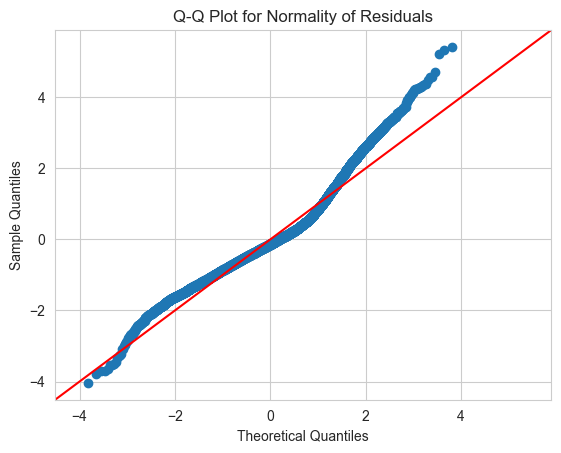

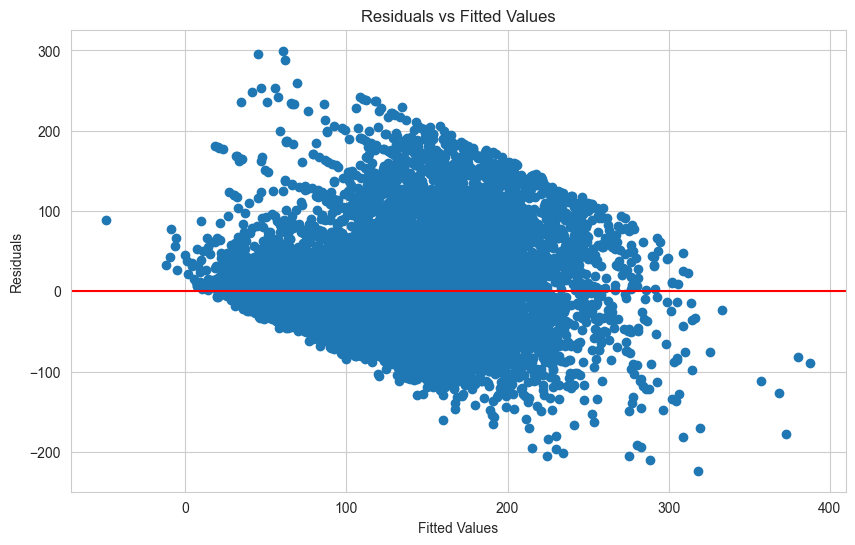

In [16]:
# Get the residuals by subtracting y_test with y_predict
residuals = y_test - y_pred

# Q-Q plot for normality of residuals
plt.figure(figsize=(10,6))
qq_plot = sm.qqplot(residuals, fit=True, line = "45")
plt.title('Q-Q Plot for Normality of Residuals')
plt.show()

# Scatter plot for homoscedasticity 
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### Interpretation

**Q-Q Plot**
- The Q-Q plot is a tool to help us check if the prices predicted by our model follow a bell-shaped curve, which is what we expect in a good model. The points on the plot mostly follow the straight line, which means our model's predictions are fairly normal, but there are a few points at the ends that deviates from the line, indicating some small deviations from the ideal normal distribution.

**Residuals vs Fitted Values Plot**
- . We want the scatter to be randomly scattered and not forming any clear patterns. Our plot shows a bit of a pattern, with the dots fanning out as we move to the right, suggesting that our model is less consistent at predicting higher prices. This is something we might want to improve.

# Advanced Modelling  <a id="Advanced-Modeling"></a>

We will use the dataframe with the dropped columns(collinear and multicollinear columns) for advanced modelling.

In [17]:
# Checkout the fianl dataframe with multicolinear columns removed
X_multicollinear_reduced.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,accommodates,bedrooms,...,amenity_heating,amenity_washer,amenity_dryer,host_verification_email,host_verification_phone,host_verification_photographer,host_verification_work_email,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,0.000000,0.897648,0.0,3.0,1.0,0.0,43.64080,2,1.462938,...,0,0,0,1,1,0,0,0.0,1.0,0.0
1,4.0,1.000000,0.930000,1.0,16.0,1.0,1.0,43.66143,1,1.462938,...,0,0,0,1,1,0,0,0.0,1.0,0.0
2,4.0,0.948186,0.897648,0.0,1.0,1.0,1.0,43.78345,2,1.000000,...,0,0,0,1,1,0,0,0.0,1.0,0.0
3,3.0,1.000000,0.220000,0.0,10.0,1.0,1.0,43.64608,4,1.000000,...,0,0,0,1,1,0,1,0.0,0.0,0.0
4,4.0,1.000000,0.800000,0.0,1.0,1.0,1.0,43.68219,7,3.000000,...,0,0,0,1,1,0,1,0.0,0.0,0.0


In [18]:
# Checkout the price (target) dataframe
final_df["price"]

0        102.0
1         60.0
2         88.0
3        338.0
4        300.0
         ...  
60286     90.0
60287    188.0
60288     68.0
60289    136.0
60290     90.0
Name: price, Length: 60291, dtype: float64

### (Linear Regression) Third Iteration <a id="Linear-Regression"></a>

For out third iteration, we will be using linear regression with features already accounted for collinearity and multicollinearity. Additionally, we will also normalize the data and use PCA to combine features. We will use a pipeline so there is no leak in the data,  furthermore, we will also use Gridsearch to tune the hyperparameter to select the best values for the parameter, we will then use that to predict our prices from the x_test. 

- We will use PCA, which will account for overfitting of the model. However, it does ta\ke away the feature explainability aspect as we will be combining the features in order to predict. 

In [19]:
# Pipeline with standard scaling, PCA and linear regression
estimators_lr = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('linear_regression', LinearRegression())
]

pipe_linear_reg = Pipeline(estimators_lr)

# Set the grid search parameters
param_grid = {
    'pca__n_components': [5, 10, 20], 
    'linear_regression__fit_intercept': [True, False]
}

# GridSearchCV 
grid_search_lr = GridSearchCV(pipe_linear_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search_lr.fit(X_train, y_train)  



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'linear_regression__fit_intercept': [True, False],
                         'pca__n_components': [5, 10, 20]},
             scoring='neg_mean_squared_error')

In [22]:
# Take the best model from grid search
best_model_lr = grid_search_lr.best_estimator_

# Predictions with the best model
y_pred = best_model_lr.predict(X_test)

In [23]:
# Best parameters

best_params = grid_search_lr.best_params_
print(best_params)

{'linear_regression__fit_intercept': True, 'pca__n_components': 20}


The best parameters selected is a Linear Regression model with fit intercept as True and PCA n components as 20, which means it combines the features to principal component, where the number of PC is 20

In [24]:
# Evaluation metrics (Train Set)
best_model_lr.score(X_train, y_train)

0.40647051419528146

In [27]:
# Evaluation metrics ( Test Set)
r2 = r2_score(y_test, y_pred) # explains variability
rmse = mean_squared_error(y_test, y_pred, squared=False) 
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_error(y_test, y_pred) / y_test.mean() * 100  # Mean Absolute Percentage Error

evaluation_metrics = {
    'R2': r2,
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}

print(evaluation_metrics)

{'R2': 0.4063593341909041, 'RMSE': 57.277056090913504, 'MAE': 42.36288652108092, 'MAPE': 32.60532598661634}


- The model's R-squared value of 0.408 indicates that it can explain around 41% of the variability in the Airbnb prices, which suggests a moderate fit to the data. 

- The Root Mean Squared Error (RMSE) of approximately 57.22 suggests that the model's predictions usually deviate from the actual prices by about 57.22 dollars, showing the average error.

- The Mean Absolute Error (MAE) of 42.29 is another indicator of average prediction error

- the Mean Absolute Percentage Error (MAPE) of 32.55% tells us that the model's predictions are on average about 1/3 away from the actual price.


- The third iteration also decomposes the model using PCA, which accounts for over-fiting but is giving a lower R2 value of 0.408 compared to the second iteration that gave 0.44 without using PCA. 

In [28]:
# coefficients from the best model's linear regression 
coefficients = best_model_lr.named_steps['linear_regression'].coef_
coefficients.sort()
coefficients

array([-11.44686018, -11.25499667, -10.34452683,  -7.50331873,
        -6.22461675,  -4.45223035,  -3.85083285,  -2.43625748,
        -1.73983085,  -0.85705495,  -0.74979498,   0.21727844,
         0.23777693,   1.66106076,   3.51555132,   3.64276623,
         6.85714611,   7.47379555,   7.94126629,  19.17966288])

The top highest coefficients are 19,8.6, 6.82, which means that one unit increase in the price increases the price by 19,8.6, 6.82 dollars, it is difficult to say which features exactly as PCA combines the features.

## Advanced Modelling ( Random Forest Regressor 1st Iteration) <a id="Random-Forest"></a>

In [29]:
# Assign variables for X and y 
X = X_multicollinear_reduced
y = final_df["price"]

We'll divide the data into three parts: a training set, a validation set, and a test set. This way, we can adjust the model's settings using the training and validation sets. After that, we'll use the test set to see how well our model works.We use a validation set to test our model as we adjust it to make sure it learns well. 

In [30]:
# Train test split remainder and test sets 
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<img src = "http://drive.google.com/uc?export=view&id=1qUP76zVM-zyePrTcl3PGVefNBTfVKWWw" width = 500>
<center> <i><a href="https://miro.medium.com/max/1400/1*Nv2NNALuokZEcV6hYEHdGA.png">Image Source</a></i></center>

In [31]:
# Further split the data into validation and train_rem
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size=0.2, random_state=42)

we'll standardize our dataset for consistency as its important with random forest. Then, we will apply a Random Forest model. To optimize the model, we'll use a manual process where we'll loop through different values of 'max depth'. As we test each value, we'll record how well the model performs on both the training set and the validation set. This will help us visualize the performance and select the best 'max depth' value for our Random Forest model.

In [34]:
# Scale the dataset
SC = StandardScaler() # instantiate the scaler estimator

X_train_scaled = SC.fit_transform(X_train) # fit
X_validation_scaled = SC.transform(X_validation) # transform it

validation_score = list() # create empty list
train_score = list()

max_depth = [2,6,10,14,18] # hyper parameter values 

for depth in max_depth:  # For loop to select the best max depth 
    
    RF = RandomForestRegressor(max_depth=depth, random_state=42)
    
    RF.fit(X_train_scaled, y_train)
    
    train_score.append(RF.score(X_train_scaled, y_train))
    validation_score.append(RF.score(X_validation_scaled, y_validation))

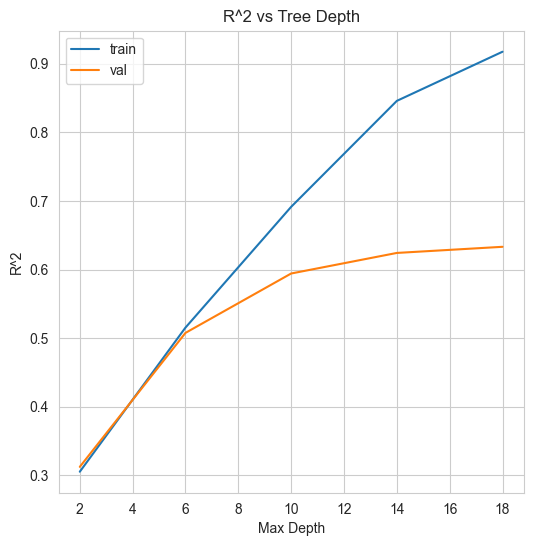

In [35]:
# Plot the R^2 vs Max_depth for train and test set to pick a max depth value 
plt.figure(figsize = (6,6))
plt.plot(max_depth, train_score, label = "train")
plt.plot(max_depth, validation_score, label = "val")
plt.xlabel("Max Depth")
plt.ylabel("R^2")
plt.title("R^2 vs Tree Depth")
plt.legend()

While tuning the 'max depth' parameter of our model, we often notice that too much depth can lead to overfitting. This means the model gets too complex, trying to capture every small detail, including noise in the training data, which can be misleading. What we're looking for is a balance where the model's error is low, but it's not overcomplicating things. After observing the performance, we've decided that a max depth of 8 is ideal. It minimizes error without overfitting. So, for our final tests, we'll set the max depth to 8 to ensure our model performs well without fitting the training data too closely.

In [37]:
# Standardize the test set
X_test_scaled = SC.transform(X_test)


# Instantiate the model
RFF = RandomForestRegressor(max_depth=8, random_state=42)

# Fit the model
RFF.fit(X_train_scaled, y_train)

# Evaluate the model
print(f"The test score is: {RFF.score(X_test_scaled,y_test)}")
print(f"The train score is: {RFF.score(X_train_scaled, y_train)}")

The test score is: 0.5514529021746014
The train score is: 0.6001898602016587


The results shows that our model using Random Forest with a max depth of 8 has yielded a test score of approximately 0.55 and a train score of about 0.60. These scores shows the model's ability to explain the variability of the target variable based on the features it has learned. In contrast, our baseline model, which was a Linear Regression, had an R^2 score of 0.44.

This improvement from 0.4 to 0.55 in the test score suggests that the Random Forest model with the chosen max depth is a better fit for our data than the simpler Linear Regression model. The higher scores mean that the Random Forest is capturing more patterns in the data.

The difference between the train score and the test score in the Random Forest model also shows a slight overfitting, as the model performs better on the training data than on unseen test data. Nonetheless, the scores are relatively close, which is a good sign that our model is generalizing well.

## Advanced Modelling ( Random Forest Iteration 2nd Iteration) 

The manual hyperparameter tuning is a good idea to build an intuition, however there are a few problems with this method:

- There's more to a model's parameter than just 'max depth.' Other parameters can also significantly impact the model's performance.

- When we split our data into training and validation sets, we can't be sure that our split is the best representation of all the data we have. To address this, we use a technique called K-fold cross-validation. This method divides the data into several sections and then uses each one as a validation set at different times. This helps ensure that we use all our data effectively to evaluate our model and choose the best settings.

K-fold cross-validation gives us a better way to select hyperparameters by ensuring that our model is tested on various subsets of the data.This way, we can be more confident that the model will perform well on unseen data.

<img src = "http://drive.google.com/uc?export=view&id=1S4VN1EaAMReqzFhRbG-qplGL77oIJnwE" width = 800>

In [38]:
# Assign variables
X = X_multicollinear_reduced
y = final_df["price"]

# Train test split 
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- The 'min_samples_split' parameter in a Random Forest model is like a rule for deciding when the model should stop splitting up the data into smaller groups. The 'min_samples_split' tells you how small these groups can be before you stop dividing them further. If the number is small, you keep making lots of tiny groups. If it's big, you end up with fewer, larger groups.

- Why is this important? Because, if you make too many tiny groups, the model might get too caught up in the tiny details and miss the bigger picture. But if your groups are too big, it might not see important patterns in the data.

- we will use K-fold cross-validation to figure out the best number for 'min_samples_split'. We'll try few of different numbers in a loop, each time checking how well our model does. Then we'll take the average score from all these tests to pick the number that works best. This chosen 'min_samples_split' will then be used on our test data to see how well our model really performs.

In [39]:
# Scale the dataset
SC = StandardScaler() # instantiate the scaler estimator

X_remainder_scaled = SC.fit_transform(X_remainder) # fit

cross_val_scores = list()

min_samples_split = [2,6,10,14,18]

for sample in min_samples_split:
    RF_model = RandomForestRegressor(min_samples_split=sample, max_depth=8, random_state = 42)
    
    cv_score = np.mean(cross_val_score(RF_model, X_remainder_scaled, y_remainder, cv = 5 ))
    
    cross_val_scores.append(cv_score)

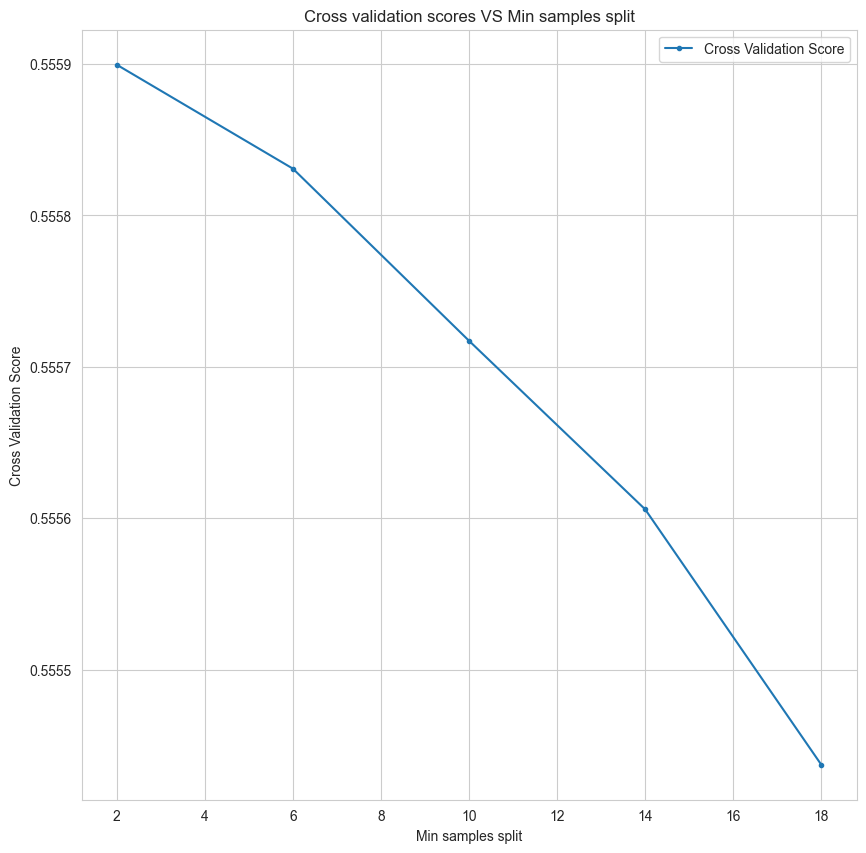

In [40]:
# Plot the figure
plt.figure(figsize = (10,10))
plt.plot(min_samples_split, cross_val_scores,label="Cross Validation Score",marker='.')
plt.title("Cross validation scores VS Min samples split")
plt.legend()
plt.xlabel('Min samples split')
plt.ylabel('Cross Validation Score')
plt.show()

We see that, as min sample split increases, there is a decrease in cross val scores, it is because lower the sample split, it overfits the model, as there is more splits that can be done.
At min samples split = 6, we get the best mean scores. So, we can use min_samples_split= 6 for the test set, as it is in the mid.

In [41]:
# Standardize the test set
X_test_scaled = SC.transform(X_test)

# Instantiate the model
RFF = RandomForestRegressor(max_depth=8, min_samples_split= 6,random_state = 42)

# Fit the model
RFF.fit(X_remainder_scaled, y_remainder)

# Evaluate the model
print(f"The test score is: {RFF.score(X_test_scaled,y_test)}")
print(f"The train score is: {RFF.score(X_remainder_scaled, y_remainder)}")

The test score is: 0.5532173173998228
The train score is: 0.5941054105433479


There is not much difference from the previous iteration to this, lets try more feature engineering

- A good rule of thumb is keeping  20% of your data in each fold, or 5-fold cross validation.
- We see that, the test baerly improved our result. 

### Y transformed to Log(Y)

Another feature engineering we can do is transform the prices to log prices, this transformation can help the dataset to be better distributed removing skewness and the affect of outliers in the modelling.

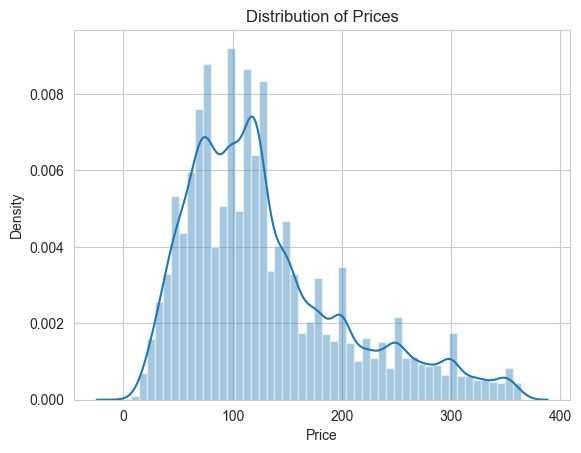

In [42]:
# Plot the distribution of the 'price' column 
sns.distplot(final_df["price"])
plt.xlabel('Price')  
plt.ylabel('Density')  
plt.title('Distribution of Prices')  
plt.show()

We can see that there is a long right skew in the distribution, which maybe making it difficult for the model to grasp the patterns within.

In [43]:
# Convert the prices to log prices
log_price = np.log(final_df["price"])
log_price[np.isinf(log_price)] = 0

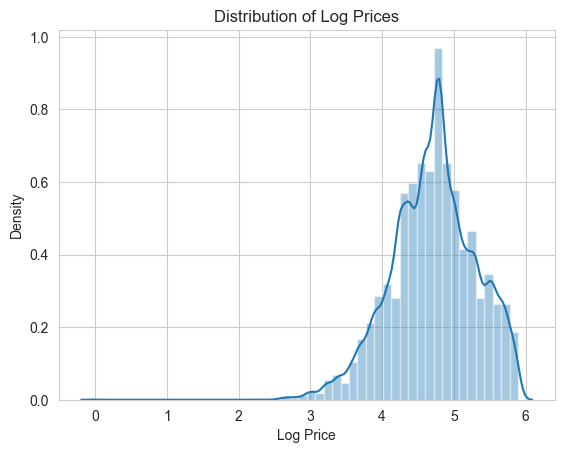

In [44]:
# Plot the distribution of the 'price' column
sns.distplot(log_price)
plt.xlabel('Log Price')  
plt.ylabel('Density')  
plt.title('Distribution of Log Prices')  
plt.show()

Here after the transformation, we see a better normal distribution. This can lead to better model performance and more reliable predictions.

In [45]:
# Apply log transformation to the variables 
y_remainder_log = np.log(y_remainder)
y_test_log = np.log(y_test)

# Convert 'inf' and '-inf' values to 0
y_remainder_log[np.isinf(y_remainder_log)] = 0
y_test_log[np.isinf(y_test_log)] = 0

In [46]:
# Standardize the test set
X_test_scaled = SC.transform(X_test)

# Instantiate the model
RFF = RandomForestRegressor(max_depth=8, min_samples_split= 6,random_state = 42)

# Fit the model
RFF.fit(X_remainder_scaled, y_remainder_log)

# Evaluate the model
print(f"The test score is: {RFF.score(X_test_scaled,y_test_log)}")
print(f"The train score is: {RFF.score(X_remainder_scaled, y_remainder_log)}")

The test score is: 0.6029189622327005
The train score is: 0.6250300400720733


By applying a logarithmic transformation to the Airbnb prices, we have seen a noticable improvement in the model's performance. Specifically, the test score has increased from 0.552 to 0.604, and the train score has improved from 0.594 to 0.627. This increase in scores reflects a model that is now better at capturing the underlying patterns in the data, leading to more accurate predictions of Airbnb prices.

In [50]:
# Convert the log price back to price
pred_RF = RFF.predict(X_test_scaled)

pred_RF_ori = np.exp(pred_RF)
y_test_ori = np.exp(y_test_log)

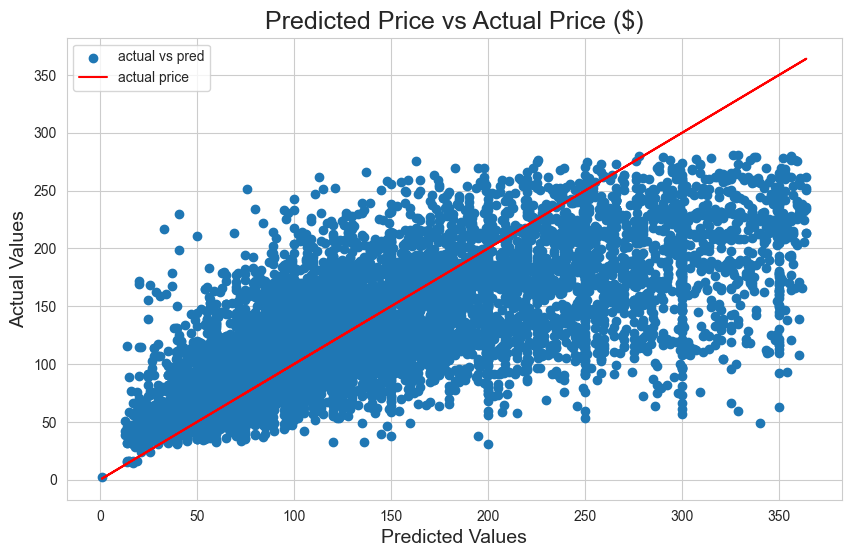

In [129]:
# Plot the actual vs predicted prices
plt.figure(figsize= (10,6))
plt.scatter(y_test_ori, pred_RF_ori, label = "actual vs pred")
plt.plot(y_test_ori,y_test_ori, label = "actual price",color = "red")
plt.title('Predicted Price vs Actual Price ($)', fontsize=18)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.legend()
plt.show()

The data points are spread out across the plot, with a more concentration of points along the lower price range of both axes, indicating that for lower-priced airbnbs, the model has a lot of data to predict from. As the predicted price increases, the data points become more spread out, indicating that, there is a greater variance in the actual prices at these higher predicted values. This could suggest that the model is less accurate in its predictions as the price increases.

In [147]:
# Create a Dataframe to show the top 10 features 
RFF_feature_important = pd.DataFrame(RFF.feature_importances_,index =  X_multicollinear_reduced.columns, columns=["Coeff"])
RFF_feature_important = RFF_feature_important.sort_values( by = "Coeff",ascending = False).head(10)

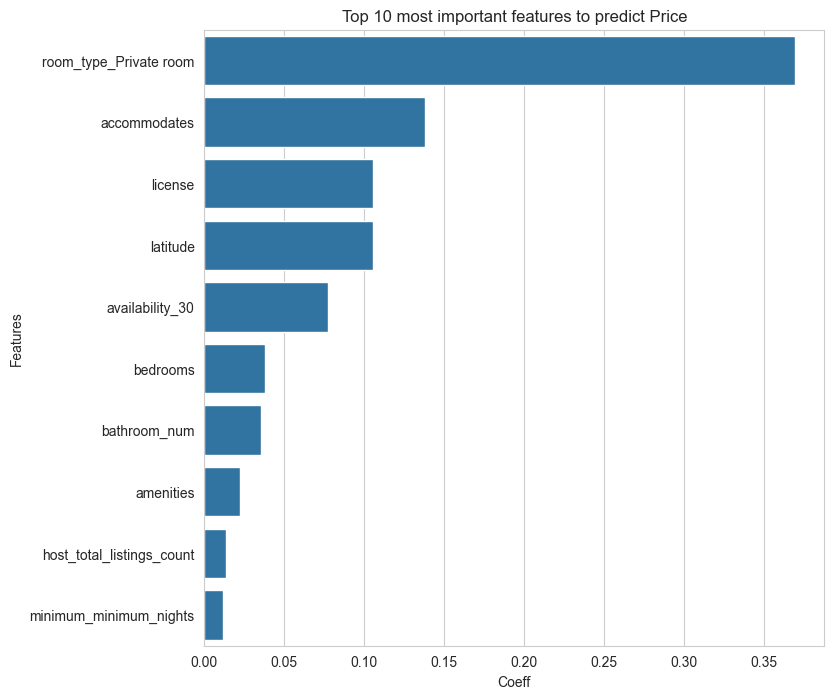

In [152]:
plt.figure(figsize = (8,8))
sns.barplot(
    x='Coeff',
    y=RFF_feature_important.index,
    data=RFF_feature_important,
    orient='h'
)
plt.title("Top 10 most important features to predict Price")
plt.ylabel("Features")
plt.show()

with Random Forest model, the most important features predicting prices are room_type, accomodation, license, latitude, 30days availability 

## GRIDSEARCHCV (RandomForest)

In [71]:
# parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10,30], 
    'min_samples_split': [2,10],  
    'min_samples_leaf': [1,4],    
    'bootstrap': [True, False]        
}

# base model to tune
rf = RandomForestRegressor()


# grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2)

# Fit the grid search 
grid_search.fit(X_remainder, y_remainder_log)

# Best parameters found
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  56.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  56.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total

In [78]:
# Predict for x_test and convert back to original
pred_gs = grid_search.predict(X_test)
pred_gs_ori = np.exp(pred_gs)

In [80]:
# Evaluation metrics ( Test Set)
r2 = r2_score(y_test, pred_gs_ori) # explains variability
rmse = mean_squared_error(y_test, pred_gs_ori, squared=False) 
mae = mean_absolute_error(y_test, pred_gs_ori)
mape = mean_absolute_error(y_test, pred_gs_ori) / y_test.mean() * 100  # Mean Absolute Percentage Error

evaluation_metrics = {
    'R2': r2,
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}

print(evaluation_metrics)

{'R2': 0.6281287032640976, 'RMSE': 45.48150241471469, 'MAE': 27.958564434721097, 'MAPE': 21.575487361763322}


GridsearchCV gives similar R2 of 0.62 than previously done.

## GRIDSEARCHCV ( XG Boost regressor) <a id="XG-Boost"></a>

For our next iteration, we'll be using the XGBoost regressor, a powerful model that excels in handling complex datasets by building on decision trees sequentially to improve predictions.we will also use grid search,an approach to tuning the model's parameters, such as the number of estimators and learning rate, to find the optimal configuration for the most accurate results. 

In [97]:
# Define the pipeline
pipeline_XG = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('xgb', XGBRegressor())        
])

# Define the parameter grid for XGBoost
param_grid_XG = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.7, 1],
    'xgb__colsample_bytree': [0.7, 1]
}

# Create a GridSearchCV object
grid_search_XG = GridSearchCV(pipeline_XG, param_grid_XG, cv=5,scoring='neg_mean_squared_error')

grid_search_XG.fit(X_remainder, y_remainder_log)

best_params_XG = grid_search_XG.best_params_
best_model_XG = grid_search_XG.best_estimator_


In [100]:
# look at the best parameters
best_params_XG

{'xgb__colsample_bytree': 1,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 5,
 'xgb__n_estimators': 200,
 'xgb__subsample': 0.7}

These are the parameters that give the best model 

In [101]:
# Checkout the best model
best_model_XG

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [104]:
# Predict 
log_predictions_XG = best_model_XG.predict(X_test)

# Scale it back to original
pred_original_scale = np.exp(log_predictions_XG)

In [106]:
# Evaluation metrics (Train Set)
best_model_XG.score(X_remainder, y_remainder_log)

0.7214406659081385

In [107]:
# Evaluation metrics ( Test Set)
r2 = r2_score(y_test, pred_original_scale) # explains variability
rmse = mean_squared_error(y_test, pred_original_scale, squared=False) 
mae = mean_absolute_error(y_test, pred_original_scale)
mape = mean_absolute_error(y_test, pred_original_scale) / y_test.mean() * 100  # Mean Absolute Percentage Error

evaluation_metrics = {
    'R2': r2,
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}

print(evaluation_metrics)

{'R2': 0.6156503674999703, 'RMSE': 46.23828404083528, 'MAE': 30.216850697808184, 'MAPE': 23.31819582028383}


The XGBoost model has delivered good results, with an R-squared value of 0.616 indicating that it can explain about 62% of the variability in the Airbnb prices, which is an improvement compared to the previous model's 0.604. The errors from the XGBoost predictions are also lower, with an RMSE of 46.24 and MAE of 30.22, suggesting that the predictions are closer to the actual prices than before. The Mean Absolute Percentage Error has also decreased to 23.32%, showing that the average prediction error as a percentage of the actual prices has reduced. And is always good to have lower MAPE value.

**However, since the training set gave us a R2 of 0.72 and the R2 of testing set gave us 0.61, there is clearly an overfit, and we will try to tune the hyperparamter in the next iteration to find a better fit.**

## Final Iteration

In the final iteration, we will use GridSearchCV to carefully adjust and test the hyperparameter of each model—Ridge, Lasso, and XGBoost regressor to find the most accurate one. We will also try different methods of preparing our data, including standard scaling, min-max scaling, and power transformation, to see which method helps improve the model's predictions.

We will also put some regularization to our XG boost model, so there is no overfit in the model. we will tune it differently this time to see what parameters matter the most.

- Ridge Regression: It adjusts the scale of the variables to prevent any single one from dominating the prediction.

- Lasso Regression: Similar to Ridge but can also reduce unimportant variables to zero, effectively selecting only the most crucial factors.


In [108]:
# Assign variables
X = X_multicollinear_reduced
y = final_df["price"]

# Train test split 
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply log transformation to the variables
y_remainder_log = np.log(y_remainder)

# Convert 'inf' and '-inf' values to 0
y_remainder_log[np.isinf(y_remainder_log)] = 0

In [110]:
estimator_XG = Pipeline([
    ('scaler', None),
    ('estimator', None)
])

param_grid_XG_final = [
    {
        'scaler': [StandardScaler(), MinMaxScaler(), PowerTransformer()],
        'estimator': [Ridge()],
        'estimator__alpha': [0.1, 1, 10, 100]  # Regularization for Ridge
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'estimator': [Lasso(max_iter=10000)],  
        'estimator__alpha': [0.001, 0.01, 0.1, 1, 10]  # Regularization for Lasso
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'estimator': [XGBRegressor()],
        'estimator__learning_rate': [0.01, 0.05, 0.1],
        'estimator__max_depth': [3, 4, 5],
        'estimator__subsample': [0.5, 0.7, 1],
        'estimator__colsample_bytree': [0.5, 0.7, 1],
        'estimator__gamma': [0, 0.1, 0.2],
        'estimator__alpha': [0, 0.1, 0.5],
        'estimator__lambda': [1, 1.5, 2]
    }
]

final_grid_search_XG = GridSearchCV(estimator_XG, param_grid_XG_final, cv=5, scoring='neg_mean_squared_error')

final_grid_search_XG.fit(X_remainder, y_remainder_log)

final_best_params_XG = final_grid_search_XG.best_params_
final_best_model_XG = final_grid_search_XG.best_estimator_

In [112]:
print(final_best_model_XG)
print("\n")
print(final_best_params_XG)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 XGBRegressor(alpha=0.1, base_score=None, booster=None,
                              callbacks=None, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=1,
                              device=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lambda=1,
                              learning_rate=0.1, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,

In [117]:
# Predict 
pred = final_best_model_XG.predict(X_test)

# Scale it back to original
pred_original_scaled = np.exp(pred)

In [118]:
# Train set Evaluation
final_best_model_XG.score(X_remainder, y_remainder_log)

0.6810317595542041

In [116]:
# Evaluation metrics ( Test set)
r2 = r2_score(y_test, pred_original_scaled) # explains variability
rmse = mean_squared_error(y_test, pred_original_scaled, squared=False) 
mae = mean_absolute_error(y_test, pred_original_scaled)
mape = mean_absolute_error(y_test, pred_original_scaled) / y_test.mean() * 100  # Mean Absolute Percentage Error

evaluation_metrics = {
    'R2': r2,
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}

print(evaluation_metrics)

{'R2': 0.5898959595662792, 'RMSE': 47.76232918120694, 'MAE': 31.592656361736243, 'MAPE': 24.379898318766145}


The R-squared value has decreased to 0.589, meaning the model can now explain about 59% of the variance in Airbnb prices,decreased from the previous 61%. The train set scores around 0.68, around .10 different than test set, so there is clearly an overfit here. 

# Deep Learning <a id="Deep-Learning"></a>

We will build neural network for the last iteration to see if it does a better job at predicting the prices. Furthermore, with neural network, we can get a good understanding of the underlying pattern, however, we trade off the explanability aspect, since it goes through a black box. 

- Neural Network Model: It's made up of layers and each layer has a certain number of neurons

- Dense: Each neuron in a dense layer is connected to all neurons in the previous layer

- Dropout: This is a method where we randomly switch off some neurons during training. 

In [119]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='linear')  # for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
model_NN = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
965/965 [==============================] - 1s 717us/step - loss: 4524.6006 - mean_absolute_error: 47.3139 - val_loss: 2947.9829 - val_mean_absolute_error: 38.7020
Epoch 2/100
965/965 [==============================] - 1s 630us/step - loss: 3050.2581 - mean_absolute_error: 39.7718 - val_loss: 2835.6448 - val_mean_absolute_error: 37.4631
Epoch 3/100
965/965 [==============================] - 1s 632us/step - loss: 2939.1169 - mean_absolute_error: 38.8539 - val_loss: 2789.9871 - val_mean_absolute_error: 36.4574
Epoch 4/100
965/965 [==============================] - 1s 624us/step - loss: 2872.8110 - mean_absolute_error: 38.3957 - val_loss: 2691.6079 - val_mean_absolute_error: 36.4760
Epoch 5/100
965/965 [==============================] - 1s 630us/step - loss: 2816.2837 - mean_absolute_error: 37.9441 - val_loss: 2701.6812 - val_mean_absolute_error: 36.4028
Epoch 6/100
965/965 [==============================] - 1s 628us/step - loss: 2780.4600 - mean_absolute_error: 37.6638 - val_l

In [162]:
# Evaluation (Train set)

nn_train_pred = model.predict(X_train_scaled)

# Evaluation metrics ( Test Set)
r2_nn = r2_score(y_train, nn_train_pred) 
rmse_nn = mean_squared_error(y_train, nn_train_pred, squared=False)

print(r2_nn)
print(rmse_nn)

1206/1206 [==============================] - 0s 277us/step
0.649588384827416
43.6782068661478


In [121]:
## Use the model to predict the x_test
nn_y_pred = model.predict(X_test_scaled)

377/377 [==============================] - 0s 312us/step


In [122]:
# Evaluation metrics ( Test Set)
r2 = r2_score(y_test, nn_y_pred) # explains variability
rmse = mean_squared_error(y_test, nn_y_pred, squared=False) 
mae = mean_absolute_error(y_test, nn_y_pred)
mape = mean_absolute_error(y_test, nn_y_pred) / y_test.mean() * 100  # Mean Absolute Percentage Error

evaluation_metrics = {
    'R2': r2,
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}

print(evaluation_metrics)

{'R2': 0.5717814071343368, 'RMSE': 48.80577724955276, 'MAE': 33.35005633579023, 'MAPE': 25.736075279078065}


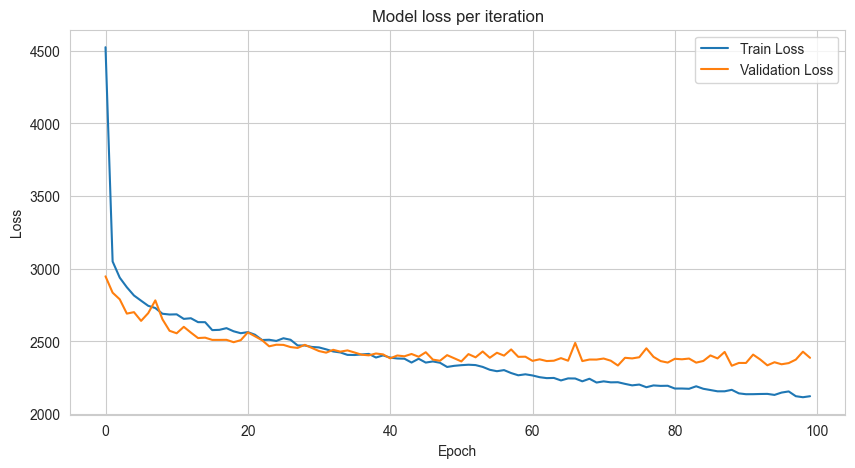

In [123]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(model_NN.history['loss'], label='Train Loss')
plt.plot(model_NN.history['val_loss'], label='Validation Loss')
plt.title('Model loss per iteration')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


- Both training and validation losses decrease rapidly in the first few epochs, showing that the model is learning quickly from the data.

- After the initial decrease, the loss continues to trend downwards more gradually.

- The training and validation loss lines are relatively close together, which is a good sign. It suggests that the model is not overfitting to the training data, as overfitting would be indicated by a large gap between the training and validation loss.

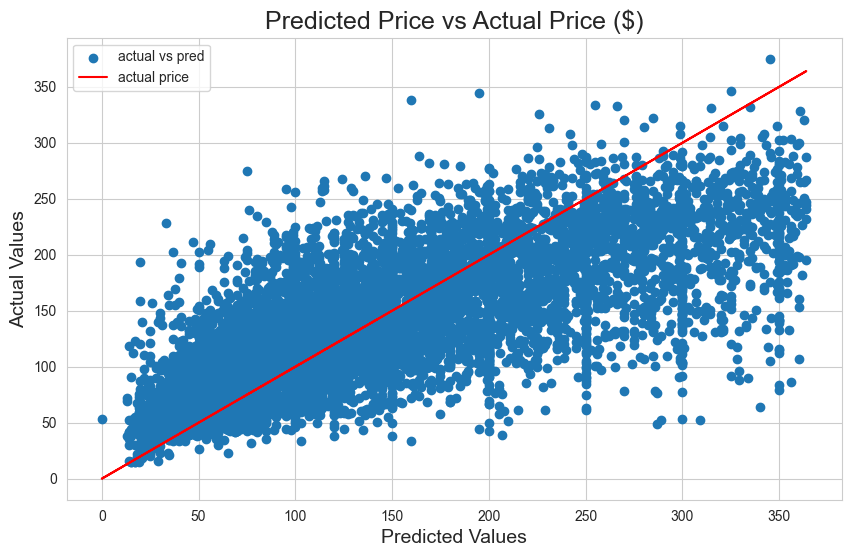

In [128]:
# Plot the actual vs predicted prices
plt.figure(figsize= (10,6))
plt.scatter(y_test,nn_y_pred, label = "actual vs pred")
plt.plot(y_test,y_test, label = "actual price",color = "red")
plt.title('Predicted Price vs Actual Price ($)', fontsize=18)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.legend()
plt.show()

The distribution of points shows a scatter spread across the plot with a concentration of data around the lower end of the price range, indicating that the model has better ability to predict prices more accurately at the lower end. As the predicted price increases, the points disperse more widely, suggesting the model's predictions become less accurate for higher-priced listings. This could mean the model may not be capturing some factors that significantly influence higher prices.

The absence of a clear linear pattern or clustering of points along the red line where the predicted price equals the actual price suggests that the model's predictions are not consistently with the actual prices, especially as the prices increase.

## Result <a id="Results"></a>

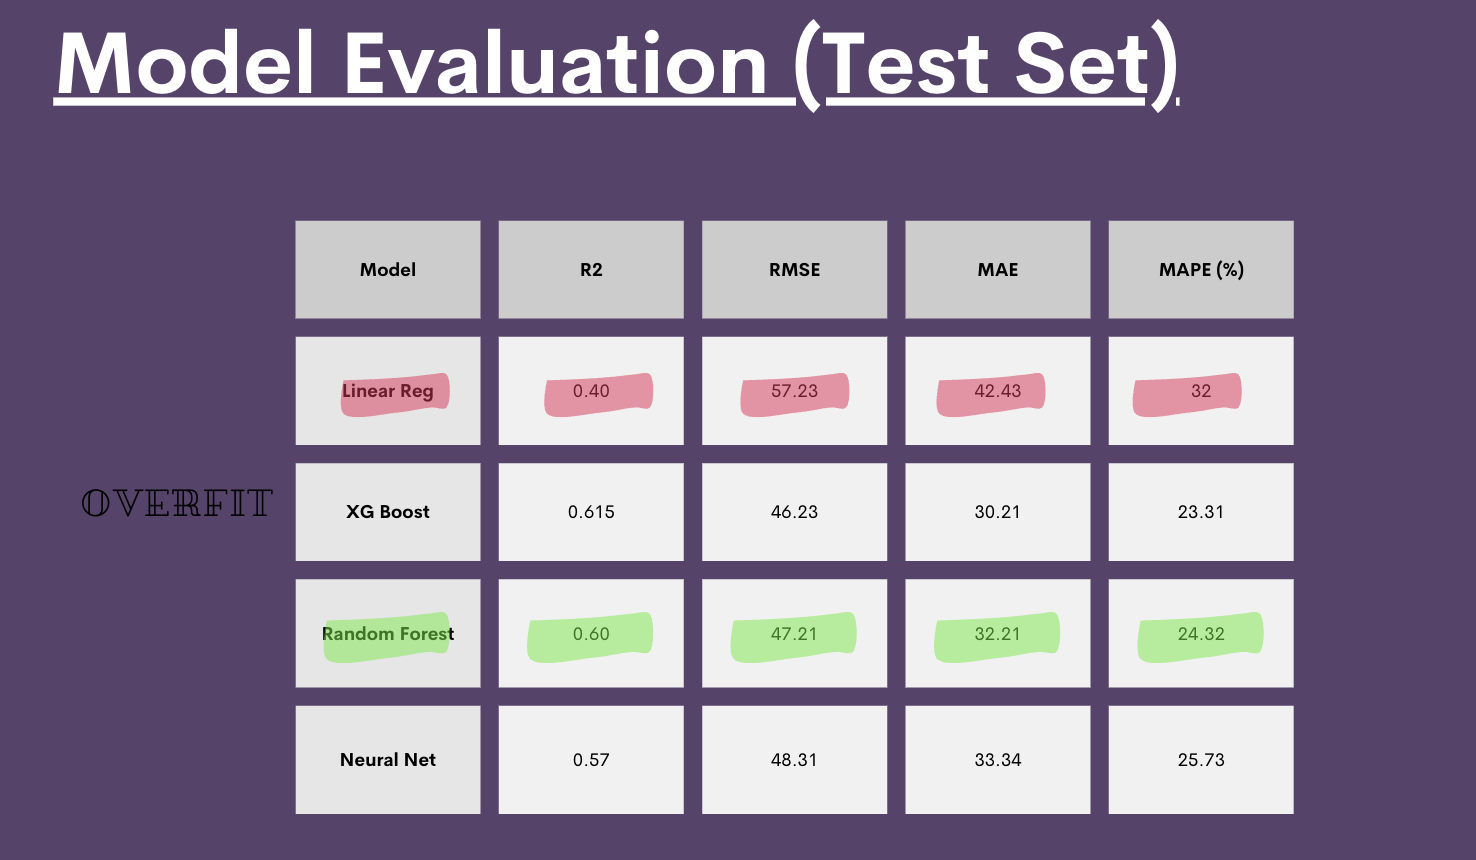

In [157]:
Image(filename='result.jpg')

# Conclusion <a id="Conclusion"></a>

In Conclusion, while the XG Boost model showed the highest R2 score on the test set among the various models evaluated, indicating strong predictive performance, its significant overfit (with a train R2 of 0.72) suggests it may not generalize fit as well to unseen data. The Random Forest model,on the other hand with train (R2 of 0.62) and test (R2 of 0.60) scores, showed the most reliable for predicting Airbnb prices, showing good generalization and a substantial improvement over the baseline Linear Regression model ( R2 of 0.40). The key predictors identified by the Random Forest model — room type, number of accommodations, license, and latitude — offer actionable insights for hosts looking to optimize their pricing strategies on the platform.

Random Forest not only shows consistent R2 scores between the training and test sets, but it also has relatively low RMSE and MAE values compared to the Linear Regression model.

Despite the XG Boost model having the lowest MAE and MAPE,the overfitting issue shown by the R2 discrepancy between the train and test sets indicates that Random Forest offers a more balanced solution.

# Export Models

In [163]:
# export models
dump(best_model_lr, 'linear_regression_model.pkl')
dump(best_model_XG, 'XGboost_model.pkl')
dump(RFF,'Randomforest.pkl')
dump(model,'neuralnet.pkl')

['neuralnet.pkl']

# Future plans <a id="Future-Plan"></a>

Moving forward, we aim to improve the current R2 ceiling of 0.61 by exploring a multifaceted approach. This includes integrating more granular data, to capture additional variance. We also plan to experiment with advanced neural network architectures that might reveal deeper interactions within the data.